   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

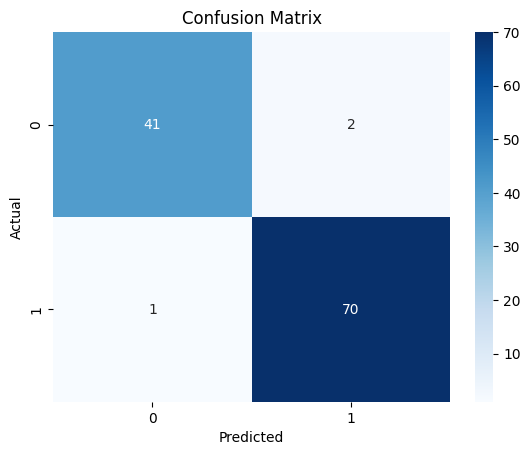

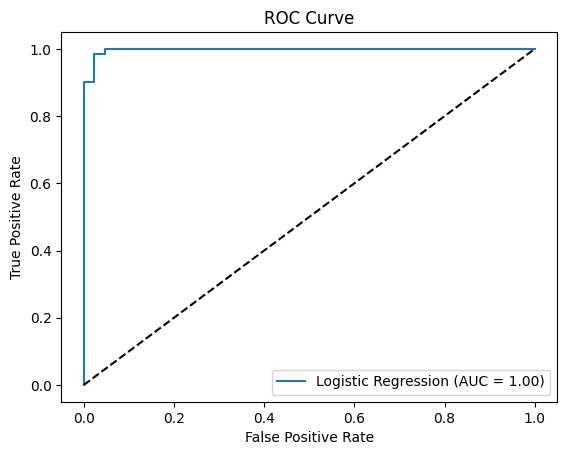

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [5]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer # Changed to load_breast_cancer as load_heart_disease is deprecated
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = load_breast_cancer(as_frame=True)  # Load dataset as DataFrame
df = data.frame
df['target'] = data.target  # Adding target column for clarity

# ... (rest of the code remains the same)
df['target'] = data.target  # Adding target column for clarity

# Display first few rows of data
print(df.head())

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Curve
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Optional: Use RandomForest for comparison
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to predict breast cancer based on user input
def predict_breast_cancer(input_features):
    # Convert input to array and reshape for prediction
    input_features = np.array(input_features).reshape(1, -1)

    # Standardize the input features
    input_features = scaler.transform(input_features)

    # Make a prediction
    prediction = model.predict(input_features)
    prediction_proba = model.predict_proba(input_features)

    # Interpret the result
    if prediction[0] == 1:
        return "Prediction: Malignant", f"Confidence: {prediction_proba[0][1] * 100:.2f}%"
    else:
        return "Prediction: Benign", f"Confidence: {prediction_proba[0][0] * 100:.2f}%"

# Example: Prompting user to input values for prediction
print("\nEnter values for the following features:")
user_input = []
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Make prediction based on the input values
result, confidence = predict_breast_cancer(user_input)
print(result)
print(confidence)
2

Model Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Enter values for the following features:
mean radius: 3
mean texture: 5
mean perimeter: 2
mean area: 7
mean smoothness: 2
mean compactness: 2
mean concavity: 8
mean concave points: 3
mean symmetry: 7
mean fractal dimension: 3
radius error: 4
texture error: 6
perimeter error: 7
area error: 3
smoothness error: 4
compactness error: 7
concavity error: 3
concave points error: 9
symmetry error: 0
fractal dimension error: 4
worst radius: 3
worst texture: 4
worst perimeter: 3
worst area: 6
worst smoothness: 3
worst compactness: 7
worst concavity: 3
worst concave points: 6
worst symmetry: 7
worst fractal dimension: 3
Prediction:

2